# Content

* [Getting data](#1.Getting-data)
* [Prediction](#2.Prediction)
* [News scrapping](#News-scrapping)

## 1.Getting data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
%%time
# Downloading 2008.01.01-2022.02.24 prices from https://markets.businessinsider.com/
gold = pd.read_json('https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Commodity&tkData=300002,1,0,333&from=20080101&to=20220224')
oil  = pd.read_json('https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Commodity&tkData=300002,6,0,333&from=20080101&to=20220224')
sugar= pd.read_json('https://markets.businessinsider.com/Ajax/Chart_GetChartData?instrumentType=Commodity&tkData=300002,26,0,333&from=20080101&to=20220224')

Wall time: 10.8 s


In [4]:
# Function that keeps only desired columns
def clean(x):
    x.drop(['Open','High','Low','Volume','Estimate'],axis=1,inplace = True)
    x = x[['Date','Close']]
    x['Close'].fillna(method='ffill',inplace=True)
    return x

In [7]:
# Applying function on data
gold = clean(gold)
oil = clean(oil)
sugar= clean(sugar)

C:\Users\User\anaconda3\envs\tez\lib\site-packages\pandas\core\series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [67]:
# Grangercausalitytests
print('gold_oil')
grangercausalitytests(pd.DataFrame(data=zip(gold['Close'], oil['Close'])),30)
print('\ngold_sugar')
grangercausalitytests(pd.DataFrame(data=zip(gold['Close'], sugar['Close'])),30)
print('\nsugar_gold')
grangercausalitytests(pd.DataFrame(data=zip(sugar['Close'], gold['Close'])),30)
print('\nsugar_oil')
grangercausalitytests(pd.DataFrame(data=zip(sugar['Close'], oil['Close'])),30)
print('\noil_gold')
grangercausalitytests(pd.DataFrame(data=zip(oil['Close'], gold['Close'])),30)
print('\noil_sugar')
grangercausalitytests(pd.DataFrame(data=zip(oil['Close'], sugar['Close'])),30)

gold_oil

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0122  , p=0.9121  , df_denom=3379, df_num=1
ssr based chi2 test:   chi2=0.0122  , p=0.9120  , df=1
likelihood ratio test: chi2=0.0122  , p=0.9120  , df=1
parameter F test:         F=0.0122  , p=0.9121  , df_denom=3379, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9572  , p=0.1414  , df_denom=3376, df_num=2
ssr based chi2 test:   chi2=3.9202  , p=0.1408  , df=2
likelihood ratio test: chi2=3.9179  , p=0.1410  , df=2
parameter F test:         F=1.9572  , p=0.1414  , df_denom=3376, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8195  , p=0.0096  , df_denom=3373, df_num=3
ssr based chi2 test:   chi2=11.4822 , p=0.0094  , df=3
likelihood ratio test: chi2=11.4627 , p=0.0095  , df=3
parameter F test:         F=3.8195  , p=0.0096  , df_denom=3373, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.962

ssr based F test:         F=1.6235  , p=0.1817  , df_denom=3416, df_num=3
ssr based chi2 test:   chi2=4.8804  , p=0.1808  , df=3
likelihood ratio test: chi2=4.8769  , p=0.1810  , df=3
parameter F test:         F=1.6235  , p=0.1817  , df_denom=3416, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2148  , p=0.3023  , df_denom=3413, df_num=4
ssr based chi2 test:   chi2=4.8721  , p=0.3007  , df=4
likelihood ratio test: chi2=4.8686  , p=0.3010  , df=4
parameter F test:         F=1.2148  , p=0.3023  , df_denom=3413, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.4145  , p=0.2156  , df_denom=3410, df_num=5
ssr based chi2 test:   chi2=7.0953  , p=0.2137  , df=5
likelihood ratio test: chi2=7.0879  , p=0.2142  , df=5
parameter F test:         F=1.4145  , p=0.2156  , df_denom=3410, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.2983  , p=0.2543  , df_denom=3407, df_num=6
ssr based chi2

likelihood ratio test: chi2=9.3166  , p=0.4086  , df=9
parameter F test:         F=1.0308  , p=0.4123  , df_denom=3398, df_num=9

Granger Causality
number of lags (no zero) 10
ssr based F test:         F=1.1601  , p=0.3131  , df_denom=3395, df_num=10
ssr based chi2 test:   chi2=11.6731 , p=0.3075  , df=10
likelihood ratio test: chi2=11.6532 , p=0.3089  , df=10
parameter F test:         F=1.1601  , p=0.3131  , df_denom=3395, df_num=10

Granger Causality
number of lags (no zero) 11
ssr based F test:         F=1.2811  , p=0.2285  , df_denom=3392, df_num=11
ssr based chi2 test:   chi2=14.1879 , p=0.2228  , df=11
likelihood ratio test: chi2=14.1585 , p=0.2243  , df=11
parameter F test:         F=1.2811  , p=0.2285  , df_denom=3392, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=1.3709  , p=0.1721  , df_denom=3389, df_num=12
ssr based chi2 test:   chi2=16.5718 , p=0.1664  , df=12
likelihood ratio test: chi2=16.5317 , p=0.1681  , df=12
parameter F test:  

likelihood ratio test: chi2=5.9970  , p=0.8736  , df=11
parameter F test:         F=0.5419  , p=0.8757  , df_denom=3349, df_num=11

Granger Causality
number of lags (no zero) 12
ssr based F test:         F=0.6784  , p=0.7739  , df_denom=3346, df_num=12
ssr based chi2 test:   chi2=8.2012  , p=0.7692  , df=12
likelihood ratio test: chi2=8.1913  , p=0.7700  , df=12
parameter F test:         F=0.6784  , p=0.7739  , df_denom=3346, df_num=12

Granger Causality
number of lags (no zero) 13
ssr based F test:         F=0.7757  , p=0.6869  , df_denom=3343, df_num=13
ssr based chi2 test:   chi2=10.1658 , p=0.6803  , df=13
likelihood ratio test: chi2=10.1505 , p=0.6816  , df=13
parameter F test:         F=0.7757  , p=0.6869  , df_denom=3343, df_num=13

Granger Causality
number of lags (no zero) 14
ssr based F test:         F=0.7636  , p=0.7100  , df_denom=3340, df_num=14
ssr based chi2 test:   chi2=10.7830 , p=0.7030  , df=14
likelihood ratio test: chi2=10.7658 , p=0.7043  , df=14
parameter F test:

ssr based chi2 test:   chi2=23.8677 , p=0.0674  , df=15
likelihood ratio test: chi2=23.7835 , p=0.0689  , df=15
parameter F test:         F=1.5765  , p=0.0720  , df_denom=3337, df_num=15

Granger Causality
number of lags (no zero) 16
ssr based F test:         F=1.4780  , p=0.0983  , df_denom=3334, df_num=16
ssr based chi2 test:   chi2=23.8818 , p=0.0921  , df=16
likelihood ratio test: chi2=23.7975 , p=0.0940  , df=16
parameter F test:         F=1.4780  , p=0.0983  , df_denom=3334, df_num=16

Granger Causality
number of lags (no zero) 17
ssr based F test:         F=1.4233  , p=0.1151  , df_denom=3331, df_num=17
ssr based chi2 test:   chi2=24.4509 , p=0.1077  , df=17
likelihood ratio test: chi2=24.3625 , p=0.1099  , df=17
parameter F test:         F=1.4233  , p=0.1151  , df_denom=3331, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=1.3622  , p=0.1397  , df_denom=3328, df_num=18
ssr based chi2 test:   chi2=24.7922 , p=0.1307  , df=18
likelihood ratio 

likelihood ratio test: chi2=19.3132 , p=0.3109  , df=17
parameter F test:         F=1.1275  , p=0.3197  , df_denom=3331, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=1.0627  , p=0.3845  , df_denom=3328, df_num=18
ssr based chi2 test:   chi2=19.3408 , p=0.3711  , df=18
likelihood ratio test: chi2=19.2854 , p=0.3744  , df=18
parameter F test:         F=1.0627  , p=0.3845  , df_denom=3328, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=1.0049  , p=0.4512  , df_denom=3325, df_num=19
ssr based chi2 test:   chi2=19.3173 , p=0.4367  , df=19
likelihood ratio test: chi2=19.2621 , p=0.4401  , df=19
parameter F test:         F=1.0049  , p=0.4512  , df_denom=3325, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=0.9665  , p=0.5007  , df_denom=3322, df_num=20
ssr based chi2 test:   chi2=19.5682 , p=0.4852  , df=20
likelihood ratio test: chi2=19.5115 , p=0.4888  , df=20
parameter F test:

{1: ({'ssr_ftest': (4.580352480872882, 0.032411962386313685, 3379.0, 1),
   'ssr_chi2test': (4.584419085620624, 0.03226390602948255, 1),
   'lrtest': (4.581314720619048, 0.03232240623439672, 1),
   'params_ftest': (4.580352480873126, 0.032411962386313685, 3379.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.47919670451828, 0.08396309984025649, 3376.0, 2),
   'ssr_chi2test': (4.9657370011707975, 0.08350335230337529, 2),
   'lrtest': (4.9620939331107365, 0.08365559511685536, 2),
   'params_ftest': (2.479196704519338, 0.08396309984017435, 3376.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.9991601377321253, 0.11194920282251132, 3373.0, 3),
   'ssr_chi2test': (6.009927007590795, 0.11112825217888313, 3),
   'lrtest': (6.004590252518028, 0.11138711277536775, 3),
   'params_ftest': (1.9991601377301824, 0.11194920282278302, 3373.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

In [8]:
# Gathering all together
final = pd.DataFrame({'Date':pd.date_range(start='01/02/2008', end=pd.to_datetime('today').date())})
final['Year'] = final['Date'].dt.year
final['Month']= final['Date'].dt.month
final['Day']= final['Date'].dt.day
final['Weekday']= final['Date'].dt.weekday
final = final[['Date','Year','Month','Day','Weekday']]
final = final.join(gold.set_index('Date'), on='Date')
final = final.join(oil.set_index('Date'), on='Date',lsuffix='_gold', rsuffix='_oil')
final = final.join(sugar.set_index('Date'), on='Date')

In [10]:
# Renaming names of the columns
final.rename(columns={"Close_gold": "Gold", "Close_oil": "Oil","Close":"Sugar"},inplace=True)

In [12]:
final.head()

Date  Year  Month  Day  Weekday   Gold    Oil  Sugar
0 2008-01-02  2008      1    2        2  857.7  99.62   0.11
1 2008-01-03  2008      1    3        3  864.0  99.18   0.11
2 2008-01-04  2008      1    4        4  860.0  97.91   0.11
3 2008-01-05  2008      1    5        5    NaN    NaN    NaN
4 2008-01-06  2008      1    6        6    NaN    NaN    NaN

In [9]:
# Checking na-s
final.isna().sum()

Date          0
Year          0
Month         0
Day           0
Weekday       0
Gold       1115
Oil        1445
Sugar      1402
dtype: int64

In [13]:
# Filling na-s with forward fill
for column in ['Gold','Oil','Sugar']:
    final[column].fillna(method='ffill',inplace=True)

In [14]:
final.describe()

Year        Month          Day      Weekday         Gold  \
count  4839.000000  4839.000000  4839.000000  4839.000000  4839.000000   
mean   2014.132879     6.438727    15.728043     2.999793  1324.052017   
std       3.826745     3.472373     8.800275     1.999845   266.798984   
min    2008.000000     1.000000     1.000000     0.000000   713.250000   
25%    2011.000000     3.000000     8.000000     1.000000  1185.450000   
50%    2014.000000     6.000000    16.000000     3.000000  1286.000000   
75%    2017.000000     9.000000    23.000000     5.000000  1502.150000   
max    2021.000000    12.000000    31.000000     6.000000  2063.680000   

               Oil        Sugar  
count  4839.000000  4839.000000  
mean     71.013966     0.168250  
std      24.316662     0.051088  
min     -37.630000     0.090000  
25%      50.330000     0.130000  
50%      67.590000     0.150000  
75%      93.010000     0.190000  
max     145.290000     0.350000

In [23]:
final.head()

Date  Year  Month  Day  Weekday   Gold    Oil  Sugar
0 2008-01-02  2008      1    2        2  857.7  99.62   0.11
1 2008-01-03  2008      1    3        3  864.0  99.18   0.11
2 2008-01-04  2008      1    4        4  860.0  97.91   0.11
3 2008-01-05  2008      1    5        5  860.0  97.91   0.11
4 2008-01-06  2008      1    6        6  860.0  97.91   0.11

## 2.Prediction

In [26]:
import numpy as np
from functools import partial
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv2D,MaxPooling2D,Flatten,Dropout
import tensorflow.keras.backend as K

In [24]:
# Function that predicts the price of the given commodity. It splits the data into train/test.
# The data, columns to be used for and date for spliting the data into train/test is already given
def preprocess_for(commodity, features=final.columns, date = '2016-01-03',final=final):
    # Creating y_train/test
    y = final[['Date',commodity]]
    split_date = date
    y = y.set_index('Date')
    y_train = y.loc[:split_date]
    y_test = y.loc[split_date:]
    #Creating train/test
    final = final[features]
    final = final.set_index('Date')
    train = final.loc[:split_date]
    test = final.loc[split_date:]
    #Normalizing
    sc = MinMaxScaler()
    train_sc = sc.fit_transform(train)
    y_train_sc = sc.fit_transform(y_train)
    y_test_sc = sc.fit_transform(y_test)
    test_sc = sc.fit_transform(test)
    #Spliting
    X_train = train_sc[:-1]
    y_train = y_train_sc[1:]
    X_test = test_sc[:-1]
    y_test = y_test_sc[1:]
    #Inputs
    X_train_t = X_train[:, None]
    X_test_t = X_test[:, None]
    return X_train_t, y_train,X_test_t,y_test

In [27]:
# Applying function for Gold price prediction
X_train, y_train,X_test,y_test = preprocess_for('Oil')

In [28]:
X_train.shape

(2923, 1, 7)

### LSTM

In [29]:
def lstm(X_train,y_train):
    K.clear_session()
    #Network
    model = Sequential()
    model.add(LSTM(7, input_shape=(1, X_train.shape[-1])))
    Dense()
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    #Compile
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
    # Fit
    model = model.fit(X_train, y_train,epochs=10, batch_size=15, verbose=0)
    return model

In [30]:
model = lstm(X_train,y_train)

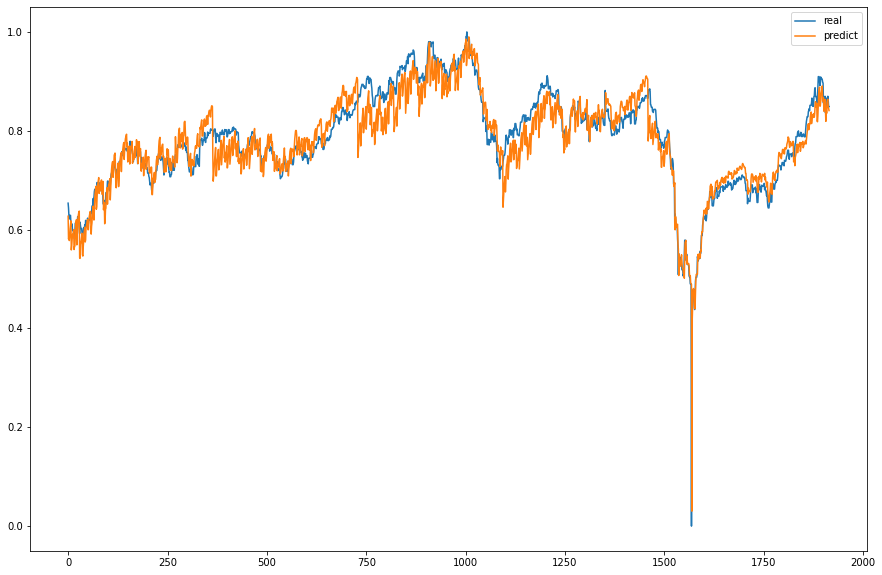

In [31]:
y_pred = model.model.predict(X_test)
plt.figure(figsize=(15, 10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

In [33]:
model.history

{'loss': [0.08862890303134918,
  0.023286428302526474,
  0.011469976045191288,
  0.004800766706466675,
  0.0019830921664834023,
  0.0010559571674093604,
  0.0007446953095495701,
  0.0006101952749304473,
  0.0005321064381860197,
  0.00047224777517840266],
 'accuracy': [0.00034211427555419505,
  0.00034211427555419505,
  0.0006842285511083901,
  0.0006842285511083901,
  0.0006842285511083901,
  0.0006842285511083901,
  0.0006842285511083901,
  0.0006842285511083901,
  0.0006842285511083901,
  0.0006842285511083901]}

### CNN

In [35]:
a = X_train.shape
b = X_test.shape

In [37]:
# Reshaping data
X_train, X_test = X_train.reshape((a[0],a[1],a[2],1)), X_test.reshape((b[0],b[1],b[2],1))

In [38]:
X_train.shape

(2923, 1, 7, 1)

In [39]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [55]:
DefaultConv2D = partial(Conv2D,
         kernel_size=3, activation='relu', padding="SAME")

model = Sequential([
         DefaultConv2D(filters=5, kernel_size=6, input_shape=(1,X_train.shape[-2],1)),
         MaxPooling2D(pool_size=1),
         DefaultConv2D(filters=4),
         DefaultConv2D(filters=4),
         MaxPooling2D(pool_size=1),
         DefaultConv2D(filters=2),
         DefaultConv2D(filters=2),
         MaxPooling2D(pool_size=1),
         Flatten(),
         Dense(units=64, activation='relu'),
         Dropout(0.5),
         Dense(units=16, activation='relu'),
         Dropout(0.5),
         Dense(units=1, activation='softmax'),])
model.compile(optimizer='adam',
              loss = root_mean_squared_error,
              metrics=['accuracy'])

In [56]:
model = model.fit(X_train, y_train, epochs=8)

Epoch 1/8
92/92 [==============================] - 1s 1ms/step - loss: 0.5808 - accuracy: 1.5766e-04
Epoch 2/8
92/92 [==============================] - 0s 1ms/step - loss: 0.5862 - accuracy: 3.1616e-04
Epoch 3/8
92/92 [==============================] - 0s 1ms/step - loss: 0.5836 - accuracy: 9.4966e-05
Epoch 4/8
92/92 [==============================] - 0s 1ms/step - loss: 0.5896 - accuracy: 0.0010
Epoch 5/8
92/92 [==============================] - 0s 1ms/step - loss: 0.5814 - accuracy: 1.1968e-04
Epoch 6/8
92/92 [==============================] - 0s 1ms/step - loss: 0.5849 - accuracy: 7.6422e-05
Epoch 7/8
92/92 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 2.4957e-04
Epoch 8/8
92/92 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 1.5766e-04


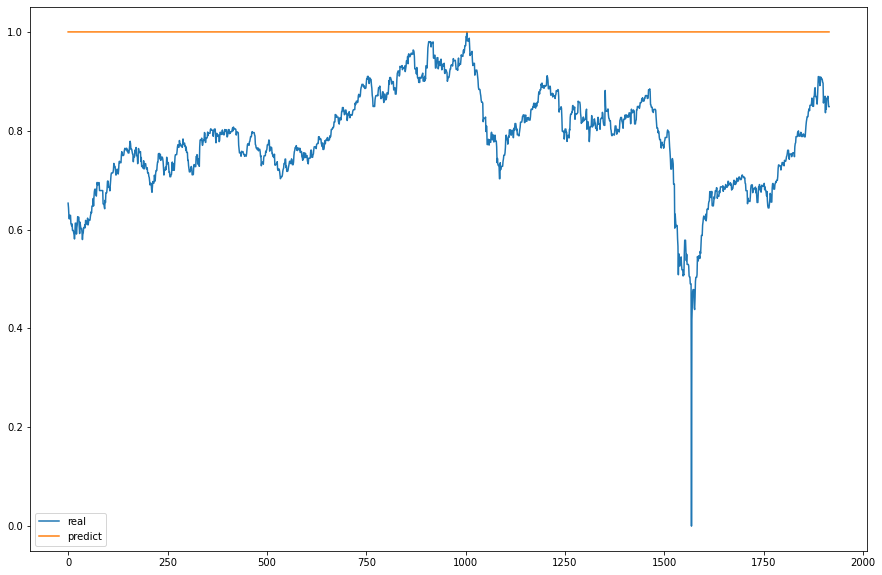

In [57]:
y_pred = model.model.predict(X_test)
plt.figure(figsize=(15, 10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['real', 'predict'])

### CNN+LSTM

In [ ]:
model = Sequential()
# define CNN model
model.add(TimeDistributed(Conv2D(filters=5, kernel_size=6, input_shape=(1,X_train.shape[-2],1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
# define LSTM model
model.add(LSTM(...))
model.add(Dense(units=64, activation='relu'))
         Dense(),
         Dropout(0.5),
         Dense(units=16, activation='relu'),
         Dropout(0.5),
         Dense(units=1, activation='softmax'),])

## News scrapping

In [1]:
from datetime import datetime
from bs4 import BeautifulSoup
from urllib.error import URLError , HTTPError , ContentTooShortError
import urllib.request
import requests
from selenium import webdriver
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
href = []
url = 'https://www.focus-economics.com/news-search'
j = 1
while j!=5000:
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        links = soup.find_all('div',attrs={'class':'view-content'})[0].find_all('a',attrs={'target': '_blank'})
        for  i in range(len(links)):
            link = links[i].get('href')
            href.append(link)
            #print(link)
        url = f'https://www.focus-economics.com/news-search?page={j}'
        j += 1
        print(url)
    except IndexError:
        print('Not found')
        pass
    except KeyboardInterrupt:
        print('Done')
        break
    except:
        print('Other error')
        pass

https://www.focus-economics.com/news-search?page=1
https://www.focus-economics.com/news-search?page=2
https://www.focus-economics.com/news-search?page=3
https://www.focus-economics.com/news-search?page=4
https://www.focus-economics.com/news-search?page=5
https://www.focus-economics.com/news-search?page=6
https://www.focus-economics.com/news-search?page=7
https://www.focus-economics.com/news-search?page=8
https://www.focus-economics.com/news-search?page=9
https://www.focus-economics.com/news-search?page=10
https://www.focus-economics.com/news-search?page=11
https://www.focus-economics.com/news-search?page=12
https://www.focus-economics.com/news-search?page=13
https://www.focus-economics.com/news-search?page=14
https://www.focus-economics.com/news-search?page=15
https://www.focus-economics.com/news-search?page=16
https://www.focus-economics.com/news-search?page=17
https://www.focus-economics.com/news-search?page=18
https://www.focus-economics.com/news-search?page=19
https://www.focus-eco

https://www.focus-economics.com/news-search?page=158
https://www.focus-economics.com/news-search?page=159
https://www.focus-economics.com/news-search?page=160
https://www.focus-economics.com/news-search?page=161
https://www.focus-economics.com/news-search?page=162
https://www.focus-economics.com/news-search?page=163
https://www.focus-economics.com/news-search?page=164
https://www.focus-economics.com/news-search?page=165
https://www.focus-economics.com/news-search?page=166
https://www.focus-economics.com/news-search?page=167
https://www.focus-economics.com/news-search?page=168
https://www.focus-economics.com/news-search?page=169
https://www.focus-economics.com/news-search?page=170
https://www.focus-economics.com/news-search?page=171
https://www.focus-economics.com/news-search?page=172
https://www.focus-economics.com/news-search?page=173
https://www.focus-economics.com/news-search?page=174
https://www.focus-economics.com/news-search?page=175
https://www.focus-economics.com/news-search?pa

https://www.focus-economics.com/news-search?page=313
https://www.focus-economics.com/news-search?page=314
https://www.focus-economics.com/news-search?page=315
https://www.focus-economics.com/news-search?page=316
https://www.focus-economics.com/news-search?page=317
https://www.focus-economics.com/news-search?page=318
https://www.focus-economics.com/news-search?page=319
https://www.focus-economics.com/news-search?page=320
https://www.focus-economics.com/news-search?page=321
https://www.focus-economics.com/news-search?page=322
https://www.focus-economics.com/news-search?page=323
https://www.focus-economics.com/news-search?page=324
https://www.focus-economics.com/news-search?page=325
https://www.focus-economics.com/news-search?page=326
https://www.focus-economics.com/news-search?page=327
https://www.focus-economics.com/news-search?page=328
https://www.focus-economics.com/news-search?page=329
https://www.focus-economics.com/news-search?page=330
https://www.focus-economics.com/news-search?pa

https://www.focus-economics.com/news-search?page=468
https://www.focus-economics.com/news-search?page=469
https://www.focus-economics.com/news-search?page=470
https://www.focus-economics.com/news-search?page=471
https://www.focus-economics.com/news-search?page=472
https://www.focus-economics.com/news-search?page=473
https://www.focus-economics.com/news-search?page=474
https://www.focus-economics.com/news-search?page=475
https://www.focus-economics.com/news-search?page=476
https://www.focus-economics.com/news-search?page=477
https://www.focus-economics.com/news-search?page=478
https://www.focus-economics.com/news-search?page=479
https://www.focus-economics.com/news-search?page=480
https://www.focus-economics.com/news-search?page=481
https://www.focus-economics.com/news-search?page=482
https://www.focus-economics.com/news-search?page=483
https://www.focus-economics.com/news-search?page=484
https://www.focus-economics.com/news-search?page=485
https://www.focus-economics.com/news-search?pa

https://www.focus-economics.com/news-search?page=623
https://www.focus-economics.com/news-search?page=624
https://www.focus-economics.com/news-search?page=625
https://www.focus-economics.com/news-search?page=626
https://www.focus-economics.com/news-search?page=627
https://www.focus-economics.com/news-search?page=628
https://www.focus-economics.com/news-search?page=629
https://www.focus-economics.com/news-search?page=630
https://www.focus-economics.com/news-search?page=631
https://www.focus-economics.com/news-search?page=632
https://www.focus-economics.com/news-search?page=633
https://www.focus-economics.com/news-search?page=634
https://www.focus-economics.com/news-search?page=635
https://www.focus-economics.com/news-search?page=636
https://www.focus-economics.com/news-search?page=637
https://www.focus-economics.com/news-search?page=638
https://www.focus-economics.com/news-search?page=639
https://www.focus-economics.com/news-search?page=640
https://www.focus-economics.com/news-search?pa

https://www.focus-economics.com/news-search?page=778
https://www.focus-economics.com/news-search?page=779
https://www.focus-economics.com/news-search?page=780
https://www.focus-economics.com/news-search?page=781
https://www.focus-economics.com/news-search?page=782
https://www.focus-economics.com/news-search?page=783
https://www.focus-economics.com/news-search?page=784
https://www.focus-economics.com/news-search?page=785
https://www.focus-economics.com/news-search?page=786
https://www.focus-economics.com/news-search?page=787
https://www.focus-economics.com/news-search?page=788
https://www.focus-economics.com/news-search?page=789
https://www.focus-economics.com/news-search?page=790
https://www.focus-economics.com/news-search?page=791
https://www.focus-economics.com/news-search?page=792
https://www.focus-economics.com/news-search?page=793
https://www.focus-economics.com/news-search?page=794
https://www.focus-economics.com/news-search?page=795
https://www.focus-economics.com/news-search?pa

https://www.focus-economics.com/news-search?page=933
https://www.focus-economics.com/news-search?page=934
https://www.focus-economics.com/news-search?page=935
https://www.focus-economics.com/news-search?page=936
https://www.focus-economics.com/news-search?page=937
https://www.focus-economics.com/news-search?page=938
https://www.focus-economics.com/news-search?page=939
https://www.focus-economics.com/news-search?page=940
https://www.focus-economics.com/news-search?page=941
https://www.focus-economics.com/news-search?page=942
https://www.focus-economics.com/news-search?page=943
https://www.focus-economics.com/news-search?page=944
https://www.focus-economics.com/news-search?page=945
https://www.focus-economics.com/news-search?page=946
https://www.focus-economics.com/news-search?page=947
https://www.focus-economics.com/news-search?page=948
https://www.focus-economics.com/news-search?page=949
https://www.focus-economics.com/news-search?page=950
https://www.focus-economics.com/news-search?pa

https://www.focus-economics.com/news-search?page=1086
https://www.focus-economics.com/news-search?page=1087
https://www.focus-economics.com/news-search?page=1088
https://www.focus-economics.com/news-search?page=1089
https://www.focus-economics.com/news-search?page=1090
https://www.focus-economics.com/news-search?page=1091
https://www.focus-economics.com/news-search?page=1092
https://www.focus-economics.com/news-search?page=1093
https://www.focus-economics.com/news-search?page=1094
https://www.focus-economics.com/news-search?page=1095
https://www.focus-economics.com/news-search?page=1096
https://www.focus-economics.com/news-search?page=1097
https://www.focus-economics.com/news-search?page=1098
https://www.focus-economics.com/news-search?page=1099
https://www.focus-economics.com/news-search?page=1100
https://www.focus-economics.com/news-search?page=1101
https://www.focus-economics.com/news-search?page=1102
https://www.focus-economics.com/news-search?page=1103
https://www.focus-economics.

https://www.focus-economics.com/news-search?page=1238
https://www.focus-economics.com/news-search?page=1239
https://www.focus-economics.com/news-search?page=1240
https://www.focus-economics.com/news-search?page=1241
https://www.focus-economics.com/news-search?page=1242
https://www.focus-economics.com/news-search?page=1243
https://www.focus-economics.com/news-search?page=1244
https://www.focus-economics.com/news-search?page=1245
https://www.focus-economics.com/news-search?page=1246
https://www.focus-economics.com/news-search?page=1247
https://www.focus-economics.com/news-search?page=1248
https://www.focus-economics.com/news-search?page=1249
https://www.focus-economics.com/news-search?page=1250
https://www.focus-economics.com/news-search?page=1251
https://www.focus-economics.com/news-search?page=1252
https://www.focus-economics.com/news-search?page=1253
https://www.focus-economics.com/news-search?page=1254
https://www.focus-economics.com/news-search?page=1255
https://www.focus-economics.

https://www.focus-economics.com/news-search?page=1390
https://www.focus-economics.com/news-search?page=1391
https://www.focus-economics.com/news-search?page=1392
https://www.focus-economics.com/news-search?page=1393
https://www.focus-economics.com/news-search?page=1394
https://www.focus-economics.com/news-search?page=1395
https://www.focus-economics.com/news-search?page=1396
https://www.focus-economics.com/news-search?page=1397
https://www.focus-economics.com/news-search?page=1398
https://www.focus-economics.com/news-search?page=1399
https://www.focus-economics.com/news-search?page=1400
https://www.focus-economics.com/news-search?page=1401
https://www.focus-economics.com/news-search?page=1402
https://www.focus-economics.com/news-search?page=1403
https://www.focus-economics.com/news-search?page=1404
https://www.focus-economics.com/news-search?page=1405
https://www.focus-economics.com/news-search?page=1406
https://www.focus-economics.com/news-search?page=1407
https://www.focus-economics.

https://www.focus-economics.com/news-search?page=1542
https://www.focus-economics.com/news-search?page=1543
https://www.focus-economics.com/news-search?page=1544
https://www.focus-economics.com/news-search?page=1545
https://www.focus-economics.com/news-search?page=1546
https://www.focus-economics.com/news-search?page=1547
https://www.focus-economics.com/news-search?page=1548
https://www.focus-economics.com/news-search?page=1549
https://www.focus-economics.com/news-search?page=1550
https://www.focus-economics.com/news-search?page=1551
https://www.focus-economics.com/news-search?page=1552
https://www.focus-economics.com/news-search?page=1553
https://www.focus-economics.com/news-search?page=1554
https://www.focus-economics.com/news-search?page=1555
https://www.focus-economics.com/news-search?page=1556
https://www.focus-economics.com/news-search?page=1557
https://www.focus-economics.com/news-search?page=1558
https://www.focus-economics.com/news-search?page=1559
https://www.focus-economics.

https://www.focus-economics.com/news-search?page=1694
https://www.focus-economics.com/news-search?page=1695
https://www.focus-economics.com/news-search?page=1696
https://www.focus-economics.com/news-search?page=1697
https://www.focus-economics.com/news-search?page=1698
https://www.focus-economics.com/news-search?page=1699
https://www.focus-economics.com/news-search?page=1700
https://www.focus-economics.com/news-search?page=1701
https://www.focus-economics.com/news-search?page=1702
https://www.focus-economics.com/news-search?page=1703
https://www.focus-economics.com/news-search?page=1704
https://www.focus-economics.com/news-search?page=1705
https://www.focus-economics.com/news-search?page=1706
https://www.focus-economics.com/news-search?page=1707
https://www.focus-economics.com/news-search?page=1708
https://www.focus-economics.com/news-search?page=1709
https://www.focus-economics.com/news-search?page=1710
https://www.focus-economics.com/news-search?page=1711
https://www.focus-economics.

https://www.focus-economics.com/news-search?page=1846
https://www.focus-economics.com/news-search?page=1847
https://www.focus-economics.com/news-search?page=1848
https://www.focus-economics.com/news-search?page=1849
https://www.focus-economics.com/news-search?page=1850
https://www.focus-economics.com/news-search?page=1851
https://www.focus-economics.com/news-search?page=1852
https://www.focus-economics.com/news-search?page=1853
https://www.focus-economics.com/news-search?page=1854
https://www.focus-economics.com/news-search?page=1855
https://www.focus-economics.com/news-search?page=1856
https://www.focus-economics.com/news-search?page=1857
https://www.focus-economics.com/news-search?page=1858
https://www.focus-economics.com/news-search?page=1859
https://www.focus-economics.com/news-search?page=1860
https://www.focus-economics.com/news-search?page=1861
https://www.focus-economics.com/news-search?page=1862
https://www.focus-economics.com/news-search?page=1863
https://www.focus-economics.

https://www.focus-economics.com/news-search?page=1998
https://www.focus-economics.com/news-search?page=1999
https://www.focus-economics.com/news-search?page=2000
https://www.focus-economics.com/news-search?page=2001
https://www.focus-economics.com/news-search?page=2002
https://www.focus-economics.com/news-search?page=2003
https://www.focus-economics.com/news-search?page=2004
https://www.focus-economics.com/news-search?page=2005
https://www.focus-economics.com/news-search?page=2006
https://www.focus-economics.com/news-search?page=2007
https://www.focus-economics.com/news-search?page=2008
https://www.focus-economics.com/news-search?page=2009
https://www.focus-economics.com/news-search?page=2010
https://www.focus-economics.com/news-search?page=2011
https://www.focus-economics.com/news-search?page=2012
https://www.focus-economics.com/news-search?page=2013
https://www.focus-economics.com/news-search?page=2014
https://www.focus-economics.com/news-search?page=2015
https://www.focus-economics.

https://www.focus-economics.com/news-search?page=2150
https://www.focus-economics.com/news-search?page=2151
https://www.focus-economics.com/news-search?page=2152
https://www.focus-economics.com/news-search?page=2153
https://www.focus-economics.com/news-search?page=2154
https://www.focus-economics.com/news-search?page=2155
https://www.focus-economics.com/news-search?page=2156
https://www.focus-economics.com/news-search?page=2157
https://www.focus-economics.com/news-search?page=2158
https://www.focus-economics.com/news-search?page=2159
https://www.focus-economics.com/news-search?page=2160
https://www.focus-economics.com/news-search?page=2161
https://www.focus-economics.com/news-search?page=2162
https://www.focus-economics.com/news-search?page=2163
https://www.focus-economics.com/news-search?page=2164
https://www.focus-economics.com/news-search?page=2165
https://www.focus-economics.com/news-search?page=2166
https://www.focus-economics.com/news-search?page=2167
https://www.focus-economics.

In [ ]:
2250

In [7]:
len(href)

15771

In [9]:
import pandas as pd

In [13]:
pd.DataFrame(data=href).to_csv('news.csv')

In [40]:
from datetime import datetime

datetime.strptime('June 1 2005', '%B %d %Y')

datetime.datetime(2005, 6, 1, 0, 0)

In [58]:
def get_info(link):
    #grab the information
    url = f'https://www.focus-economics.com{link}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    news = (soup.find('div', attrs={'class': 'justify'}).text).strip()
    raw_date = soup.find('p', attrs={'class': 'grey'}).text
    date = pd.to_datetime(datetime.strptime(raw_date,'%B %d, %Y'))
    #combine all info into a list of columns
    columns = [news,date]#headline,
    #give columns names
    column_names = ['News','Date']#'Headline',
    return dict(zip(column_names, columns))

In [69]:
%%time
info = [get_info(url) for url in href[:1000]]

Wall time: 10min 37s


In [70]:
news = pd.DataFrame(info)

In [71]:
news.tail()

News       Date
995  Merchandise exports ticked down 3.6% in annual... 2020-12-20
996  At its meeting on 18 December, the Board of Di... 2020-12-18
997  The consumer confidence indicator produced by ... 2020-12-18
998  At its meeting ending on 18 December, the Bank... 2020-12-18
999  Consumer confidence came in at minus 26.0 in D... 2020-12-18

In [72]:
news['Compound'] = news['News'].apply(lambda x:analyzer.polarity_scores(x)['compound'])

In [78]:
news.tail(15)

News       Date  Compound
985  Consumer confidence came in at 88.6 in Decembe... 2020-12-22    0.8555
986  The economic tendency indicator fell to 95.6 i... 2020-12-22    0.8779
987  The economic tendency indicator fell to 95.6 i... 2020-12-22    0.8779
988  GDP fell at a softer rate of 3.5% year-on-year... 2020-12-21    0.0842
989  Consumer sentiment turned less pessimistic at ... 2020-12-21    0.6997
990  Retail sales sank 5.3% compared to the same mo... 2020-12-21   -0.6705
991  Business confidence in Germany’s private secto... 2020-12-21    0.9391
992  In November, the number of unemployed workers ... 2020-12-21   -0.5106
993  Consumer confidence came in at minus 3.8 in De... 2020-12-21    0.9382
994  The Purchasing Managers’ Index (PMI), produced... 2020-12-20    0.9423
995  Merchandise exports ticked down 3.6% in annual... 2020-12-20    0.7269
996  At its meeting on 18 December, the Board of Di... 2020-12-18    0.8070
997  The consumer confidence indicator produced by ... 2020-12-18    0.8497
998  At its meeting ending on 18 December, the Bank... 2020-12-18    0.9736
999  Consumer confidence came in at minus 26.0 in D... 2020-12-18    0.9531

In [76]:
news.groupby([pd.Grouper(freq='d',key="Date")]).mean()#.to_csv('compound.csv')
#df.groupby([pd.Grouper(freq='M',key="lastupdated")]).count()['ticker'].plot()#.bar()

Compound
Date                
2020-12-18  0.895850
2020-12-19       NaN
2020-12-20  0.834600
2020-12-21  0.246683
2020-12-22  0.787167
...              ...
2021-03-29 -0.343000
2021-03-30  0.904686
2021-03-31  0.461567
2021-04-01  0.523569
2021-04-02  0.698267

[106 rows x 1 columns]

In [5]:
import re
import csv
from time import sleep
from bs4 import BeautifulSoup
import requests

In [4]:
headers = {
    'accept': '*/*',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.google.com',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36 Edg/85.0.564.44'
}

In [37]:
def get_article(card):
    """Extract article information from the raw html"""
    headline = card.find('h4', 's-title').text
    source = card.find("span", 's-source').text
    posted = card.find('span', 's-time').text.replace('·', '').strip()
    description = card.find('p', 's-desc').text.strip()
    raw_link = card.find('a').get('href')
    unquoted_link = requests.utils.unquote(raw_link)
    pattern = re.compile(r'RU=(.+)\/RK')
    #clean_link = re.search(pattern, unquoted_link).group(1)
    
    article = (headline, source, posted, description,raw_link)#, clean_link
    return article

In [38]:
def get_the_news(search):
    """Run the main program"""
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    articles = []
    links = set()
    
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        
        # extract articles from page
        for card in cards:
            article = get_article(card)
            link = article[-1]
            if not link in links:
                links.add(link)
                articles.append(article)        
                
        # find the next page
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
            
    # save article data
    with open('results.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Headline', 'Source', 'Posted', 'Description','Link'])
        writer.writerows(articles)
        
    return articles

In [39]:
articles = get_the_news('goldprice')

In [7]:
def get_the_links(search):
    """Run the main program"""
    template = 'https://news.search.yahoo.com/search?p={}'
    url = template.format(search)
    links = []
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'NewsArticle')
        for card in cards:
            link = card.find('a').get('href')
            unquoted_link=requests.utils.unquote(link)
            try:
                pattern = re.compile(r'RU=(.+)\/RK')
                clean_link=re.search(pattern, unquoted_link).group(1)
            except AttributeError:
                clean_link=unquoted_link
            if not clean_link in links:
                links.append(clean_link)
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
    return links

In [8]:
%%time
links = get_the_links('gold_price')

Wall time: 3min 40s


In [57]:
len(links)

640

In [104]:
def get_the_links():
    """Run the main program"""
    #template = 'https://news.search.yahoo.com/search?p={}'
    #url = template.format(search)
    url = 'https://finance.yahoo.com/quote/GC%3DF?p=GC%3DF'
    links = []
    while True:
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('li', attrs=({'class':'js-stream-content Pos(r)'}))
        for card in cards:
            link = card.find('a').get('href')
            unquoted_link=requests.utils.unquote(link)
            try:
                pattern = re.compile(r'RU=(.+)\/RK')
                clean_link=re.search(pattern, unquoted_link).group(1)
            except AttributeError:
                clean_link=unquoted_link
            if not clean_link in links:
                links.append(clean_link)
        try:
            url = soup.find('a', 'next').get('href')
            sleep(1)
        except AttributeError:
            break
    return links

['https://ca.investing.com/news/commodities-news/gold-steadies-after-worst-month-in-four-years-as-yields-in-focus-2371856',
 'https://www.vice.com/en/article/4ad9ww/nft-crypto-digital-blockchain-art-explainer',
 'https://ph.investing.com/analysis/chart-of-the-day-aussie-facing-triple-whammy-of-bad-news-57875',
 'https://in.investing.com/analysis/commodities-week-ahead-gold-awaits-us-jobs-report-oil-opec-200458350',
 'http://www.econotimes.com/Americas-Roundup-Dollar-rises-to-one-month-high-Wall-Street-retreats-Gold-rebounds-Oil-steady-before-OPEC-talks-on-supply-amid-economic-recovery-March-3rd2021-1603430',
 'https://www.thestate.com/news/nation-world/national/article249709453.html',
 'https://www.marketwatch.com/story/gold-hangs-around-9-month-low-as-dollar-heads-for-weekly-climb-11614867126',
 'http://www.gurufocus.com/news/1378059/a-trio-of-stocks-that-represent-potential-bargains',
 'https://www.msn.com/en-gb/money/other/inside-the-most-valuable-homes-in-the-world/ss-BB1ehJYe?li=B

In [50]:
url = 'https://finance.yahoo.com/quote/GC%3DF?p=GC%3DF'
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
cards = soup.find_all('div',attrs=({'id':'mrt-node-quoteNewsStream-0-Stream'}))[0].find_all('div',attrs=({'id':'quoteNewsStream-0-Stream-Proxy'}))[0].find_all('div',attrs=({'class':'tdv2-applet-stream Bdc(#e2e2e6) Pos(r) Z(1)'}))[0].find_all('a')#find_all('li', attrs=({'class':'js-stream-content Pos(r)'}))

In [51]:
len(cards)

7

In [55]:
r=[]
for card in cards:
    link = card.get('href')
    unquoted_link=requests.utils.unquote(link)
    r.append(unquoted_link)

In [117]:
yahoo = []
for link in links:
    if link[16:21]=='yahoo':
        yahoo.append(link)
fxstreet = []
for link in links:
    if link[12:20]=='fxstreet':
        fxstreet.append(link)
msn = []
for link in links:
    if link[12:15]=='msn':
        msn.append(link)

In [119]:
len(yahoo)+len(fxstreet)+len(msn)

169

In [120]:
d=[]
for i in links:
    d.append(i[:25])

In [116]:
links[15:25]

['https://www.msn.com/en-in/money/topstories/gold-price-today-yellow-metal-trades-lower-silver-may-futures-also-down-over-1percent/ar-BB1e8lfL',
 'https://www.fxstreet.com/news/gold-price-analysis-fitch-raises-2021-xau-usd-price-forecast-from-1400-to-1600-202103030913',
 'https://www.msn.com/en-in/money/topstories/gold-price-today-yellow-metals-stabalises-silver-may-future-rallies-over-1percent/ar-BB1e6vH5',
 'https://www.fxstreet.com/news/gold-price-news-and-forecast-xau-usd-fell-sharply-as-usd-capitalized-on-soaring-t-bond-yields-202103010050',
 'https://www.fxstreet.com/news/gold-price-analysis-xau-usd-to-test-support-levels-in-the-1-660-zone-tds-202103051231',
 'https://www.fxstreet.com/news/gold-price-analysis-xau-usd-targets-1672-support-after-powells-blow-confluence-detector-202103050318',
 'https://www.dailyfx.com/forex/technical/home/analysis/xau-usd/2021/03/04/Gold-Price-Outlook-Gold-Breakdown-Plunges-into-Downtrend-Support-XAU-USD-Technical-Forecast-MBTS3.html',
 'https://ww